In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from generators import DiagBooleanMatrix, ArbiBooleanMatrix
from datasets import GeneratedData, Dataset

[I] m            : 200
[I] n            : 100
[I] k            : 5
[I] overlap      : [0.2 0.1 0.2 0.1]
[I] seed         : 1696383155
[I] noise        : [0.3 0.1]
[I] seed         : 1024
[I] Using RandomState.


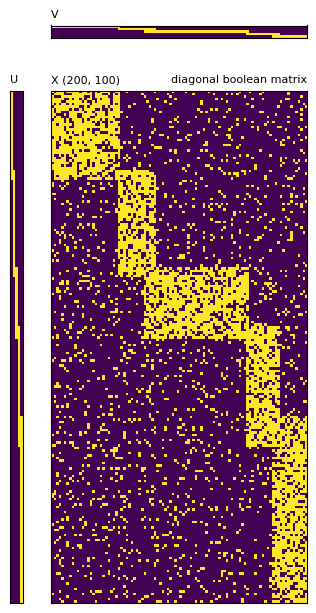

In [2]:
# generate Boolean matrix

n_row=200
n_col=100
k=5
overlap=[0.2, 0.1, 0.2, 0.1]
noise=[0.3, 0.1]

bm = DiagBooleanMatrix(m=n_row, n=n_col, k=k, overlap=overlap)
bm.generate()
bm.add_noise(noise=noise, seed=1024)
bm.show_matrix("diagonal boolean matrix")

In [3]:
gendata = GeneratedData(bm)

In [4]:
gendata.split(seed=None)

[I] dataset seed : 1696383156
[I] split settings
[I]     train_size   : 4677
[I]     val_size     : 0
[I]     test_size    : 0
[I]     seed         : 1696383156


In [5]:
train_set = Dataset()
train_set.load_X(X=gendata.train_data.matrix, U=gendata.U, V=gendata.V)

[I] Overwriting factor with another Factor object.
[I] Overwriting factor with another Factor object.


### Asso Reconstruction Test

[I] k            : 5
[I] tau          : 0.4
[I] weights      : [0.5, 0.3]
[I] display_flag : True
[W] Missing validation set.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


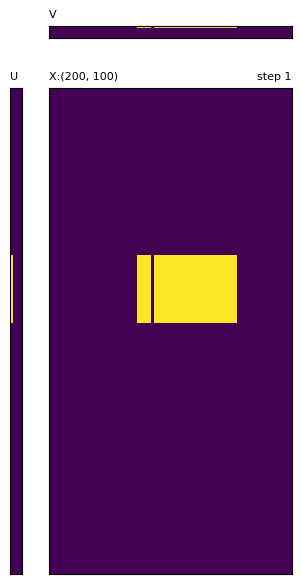

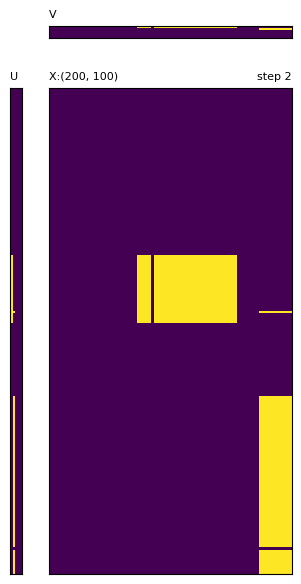

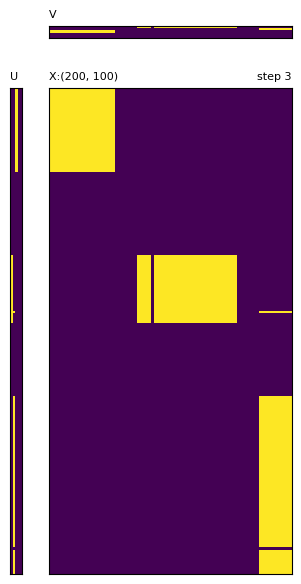

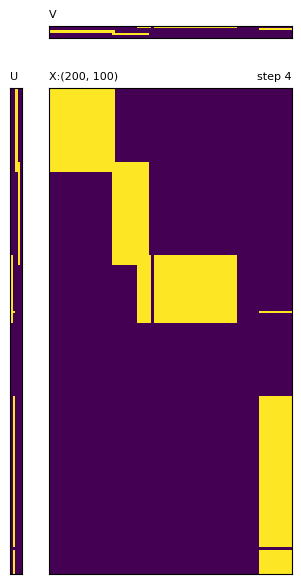

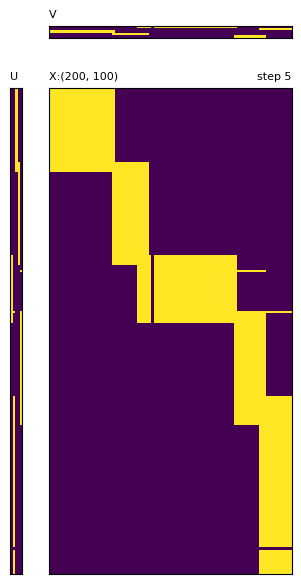

In [6]:
from models import Asso
from utils import show_matrix, check_sparse

asso = Asso(k=k, tau=0.40, w=[0.5, 0.3])
asso.fit(train_set=train_set, display_flag=True)

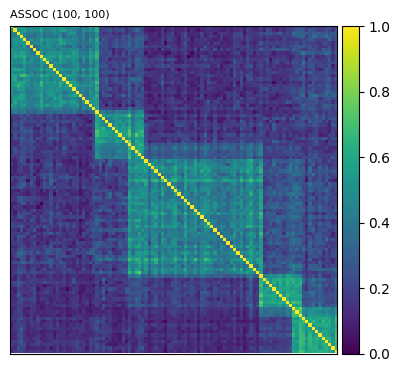

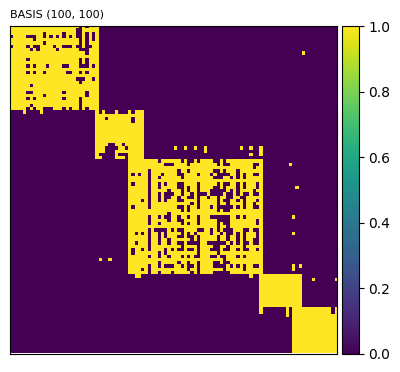

In [7]:
asso.build_assoc()
asso.build_basis()

settings = [(check_sparse(asso.assoc, sparse=False), [0, 0], "AssoC " + str(asso.assoc.shape))]
show_matrix(settings=settings, scaling=0.3, colorbar=True)

settings = [(check_sparse(asso.basis, sparse=False), [0, 0], "BASIS " + str(asso.basis.shape))]
show_matrix(settings=settings, scaling=0.3, colorbar=True)

### Asso Prediction Test

In [8]:
gendata = GeneratedData(bm)
gendata.split(test_size=0.2, val_size=0.0, seed=None)
gendata.negative_sampling(train_size=0.0, test_size=gendata.test_size, val_size=0.0, seed=None, type='uniform')

[I] dataset seed : 1696383245
[I] split settings
[I]     train_size   : 3741
[I]     val_size     : 0
[I]     test_size    : 936
[I]     seed         : 1696383245
[I] negative sampling settings
[I]     train_size   : 0
[I]     val_size     : 0
[I]     test_size    : 936
[I]     seed         : 1696383245


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [9]:
len(gendata.test_data.triplet[2])

1872

In [10]:
train_set = Dataset()
train_set.load_X(X=gendata.train_data.matrix, U=gendata.U, V=gendata.V)

test_set = Dataset()
test_set.load_X(X=gendata.test_data.matrix, U=gendata.U, V=gendata.V)

[I] Overwriting factor with another Factor object.
[I] Overwriting factor with another Factor object.
[I] Overwriting factor with another Factor object.
[I] Overwriting factor with another Factor object.


[I] k            : 5
[I] tau          : 0.4
[I] weights      : [0.5, 0.3]
[I] display_flag : True
[W] Missing validation set.


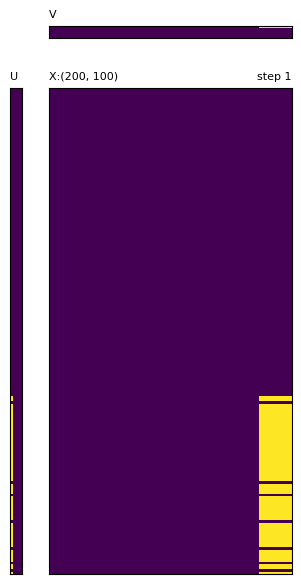

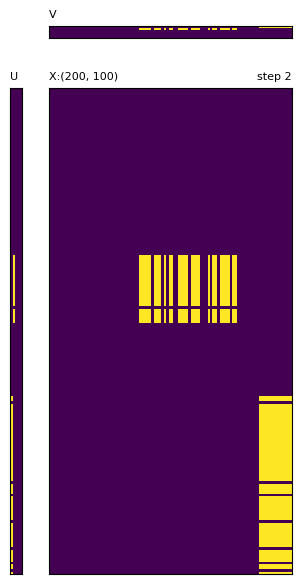

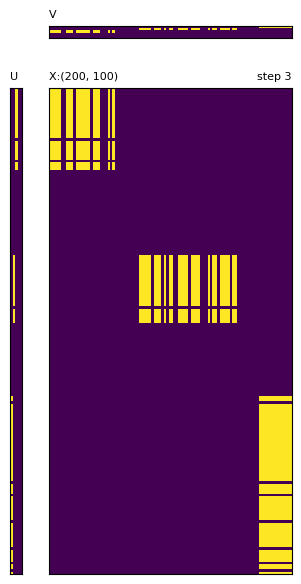

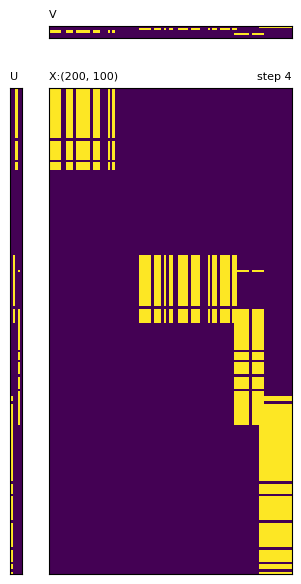

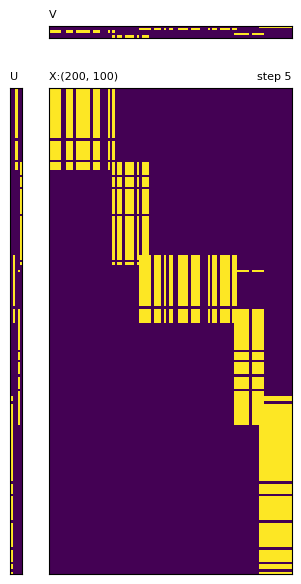

In [11]:
from models import Asso

asso = Asso(k=k, tau=0.40, w=[0.5, 0.3])
asso.fit(train_set=train_set, display_flag=True)

In [12]:
from utils import to_sparse, TP, FP
import numpy as np

U_idx = test_set.X.triplet[0]
V_idx = test_set.X.triplet[1]
gt_data = test_set.X.triplet[2]
pd_num = test_set.X.r
pd_data = np.zeros(pd_num, dtype=int)

for i in range(pd_num):
    pd = asso.score(U_idx=U_idx[i], V_idx=V_idx[i])
    pd_data[i] = pd

tpr = TP(gt=gt_data, pd=pd_data) / pd_num
fpr = FP(gt=gt_data, pd=pd_data) / pd_num

print(tpr, fpr)

0.2168803418803419 0.029914529914529916


In [13]:
TP(gt=gt_data, pd=pd_data)

406

In [14]:
FP(gt=gt_data, pd=pd_data)

56.0

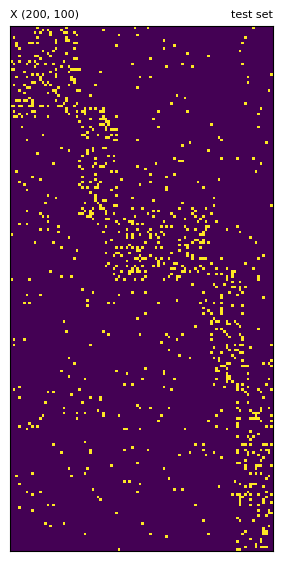

In [18]:
test_set.show_matrix(title="test set")

### Asso CMF Test

In [24]:
%load_ext autoreload
%autoreload 2
from generators import DiagBooleanMatrix, ArbiBooleanMatrix
from datasets import GeneratedData, Dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[I] m            : 200
[I] n            : 100
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.5 1.  0.5 1. ]
[I] seed         : 2023
[I] noise        : [0.3 0.1]
[I] seed         : 1024
[I] Using RandomState.


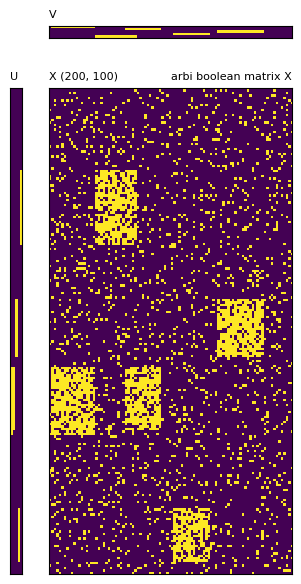

In [29]:
# make CMF dataset
n_row=200
n_col=100
k=5
overlap_flag=True
size_range=[0.5, 1.0, 0.5, 1.0]
X = ArbiBooleanMatrix(m=n_row, n=n_col, k=k, overlap_flag=False, size_range=size_range)
X.generate(seed=2023) # if no seed assigned, use time instead
X.add_noise(noise=noise, seed=1024)
X.show_matrix(title='arbi boolean matrix X')

[I] m            : 20
[I] n            : 100
[I] k            : 5
[I] overlap      : [0.2 0.1 0.2 0.1]
[I] seed         : 1997
[I] seed         : 2023
[I] Using RandomState.
[I] Using RandomState.
[I] noise        : [0.3 0.1]
[I] seed         : 1024
[I] Using RandomState.


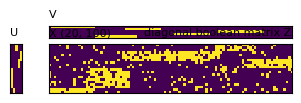

In [31]:
n_row=20
n_col=100
k=5
overlap=[0.2, 0.1, 0.2, 0.1]
noise=[0.3, 0.1]

Z = DiagBooleanMatrix(m=n_row, n=n_col, k=k, overlap=overlap)
Z.generate(seed=1997)
Z.shuffle_factors(seed=2023)
Z.V = X.V # replace one factor
Z.add_noise(noise=noise, seed=1024)
Z.show_matrix(title="diagonal boolean matrix Z")

In [32]:
X_data = GeneratedData(X)
X_data.split(test_size=0.2, val_size=0.0, seed=None)
X_data.negative_sampling(train_size=0.0, test_size=X_data.test_size, val_size=0.0, seed=None, type='uniform')

Z_data = GeneratedData(Z)
Z_data.split(test_size=0.2, val_size=0.0, seed=None)
Z_data.negative_sampling(train_size=0.0, test_size=Z_data.test_size, val_size=0.0, seed=None, type='uniform')

[I] dataset seed : 1696385451
[I] split settings
[I]     train_size   : 2702
[I]     val_size     : 0
[I]     test_size    : 676
[I]     seed         : 1696385451
[I] negative sampling settings
[I]     train_size   : 0
[I]     val_size     : 0
[I]     test_size    : 676
[I]     seed         : 1696385451
[I] dataset seed : 1696385451
[I] split settings
[I]     train_size   : 408
[I]     val_size     : 0
[I]     test_size    : 103
[I]     seed         : 1696385451
[I] negative sampling settings
[I]     train_size   : 0
[I]     val_size     : 0
[I]     test_size    : 103
[I]     seed         : 1696385451


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [47]:
train_set = Dataset()
train_set.load_X(X=X_data.train_data.matrix, U=X_data.U, V=X_data.V)
train_set.load_Z(Z=Z_data.train_data.matrix, W=Z_data.U, V=Z_data.V)

test_set = Dataset()
test_set.load_X(X=X_data.test_data.matrix, U=X_data.U, V=X_data.V)
test_set.load_Z(Z=Z_data.test_data.matrix, W=Z_data.U, V=Z_data.V)

[I] Overwriting factor with another Factor object.
[I] ???
[I] Overwriting factor with another Factor object.
[I] ???
[I] Overwriting factor with another Factor object.
[I] ???
[I] Overwriting factor with another Factor object.
[I] ???
[I] Overwriting factor with another Factor object.
[I] ???
[I] Overwriting factor with another Factor object.
[I] ???
[I] Overwriting factor with another Factor object.
[I] ???
[I] Overwriting factor with another Factor object.
[I] ???


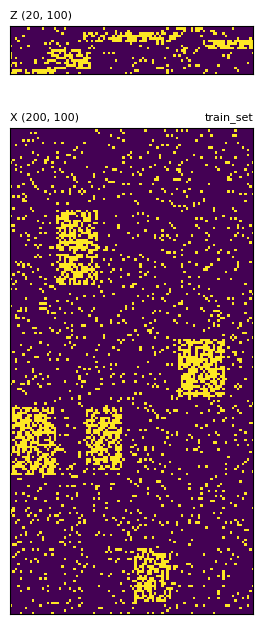

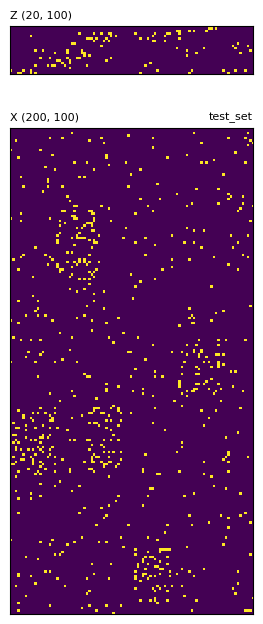

In [49]:
train_set.show_matrix(title='train_set')
test_set.show_matrix(title='test_set')

In [ ]:
train_set.U.order